Agrupar usuarios Twitter de acuerdo a su personalidad con K-means

Comenzaremos importando las librerías que nos asistirán para ejecutar el algoritmo y graficar.

In [42]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

Importamos el archivo csv -para simplificar, suponemos que el archivo se encuentra en el mismo directorio que el notebook- y vemos los primeros 5 registros del archivo tabulados.

In [2]:

dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


También podemos ver una tabla de información estadística que nos provee Pandas dataframe

In [3]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


El archivo contiene diferenciadas 9 categorías -actividades laborales- que son:

Actor/actriz
Cantante
Modelo
Tv, series
Radio
Tecnología
Deportes
Politica
Escritor

Para saber cuantos registros tenemos de cada uno hacemos:

In [4]:
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


Como vemos tenemos 34 cantantes, 27 actores, 17 deportistas, 16 políticos,etc.

Visualización de Datos
Veremos graficamente nuestros datos para tener una idea de la dispersión de los mismos:

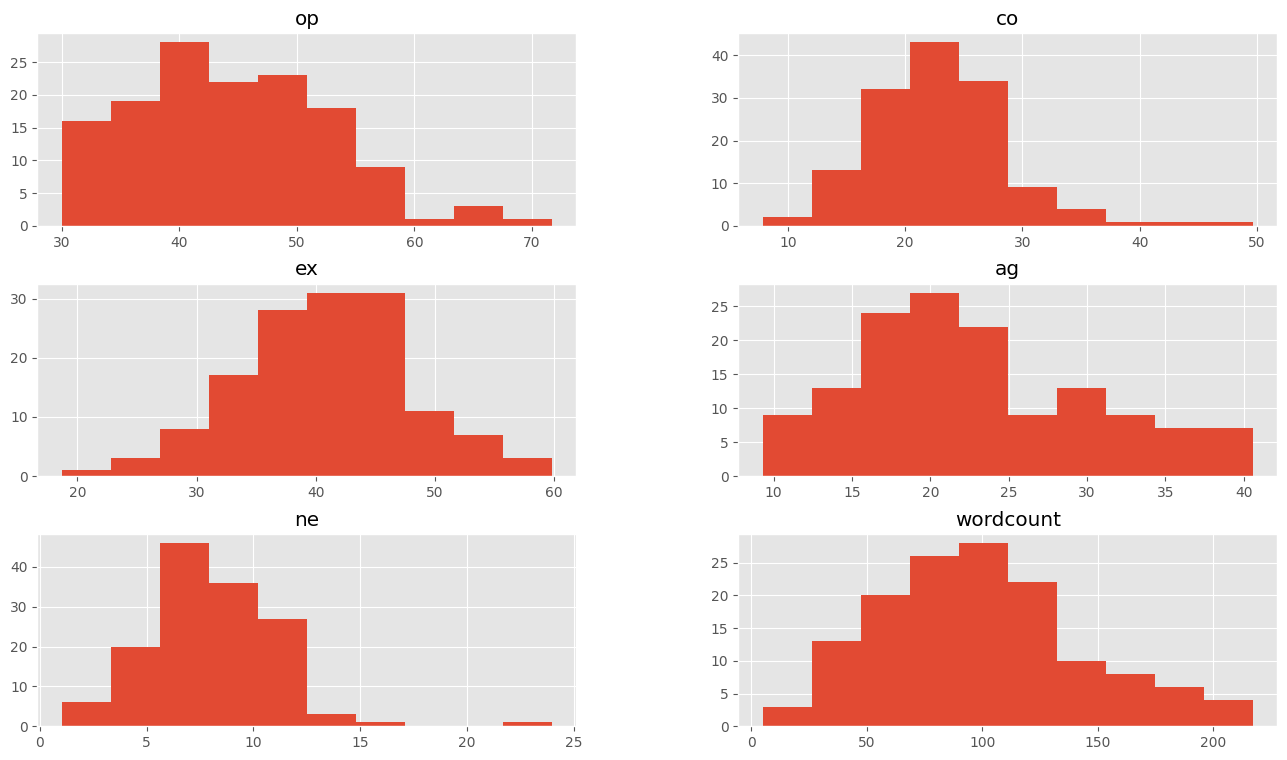

In [7]:
dataframe.drop(['categoria'], axis=1).hist()
plt.show()

En este caso seleccionamos 3 dimensiones: op, ex y ag y las cruzamos para ver si nos dan alguna pista de su agrupación y la relación con sus categorías.

c:\Users\lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


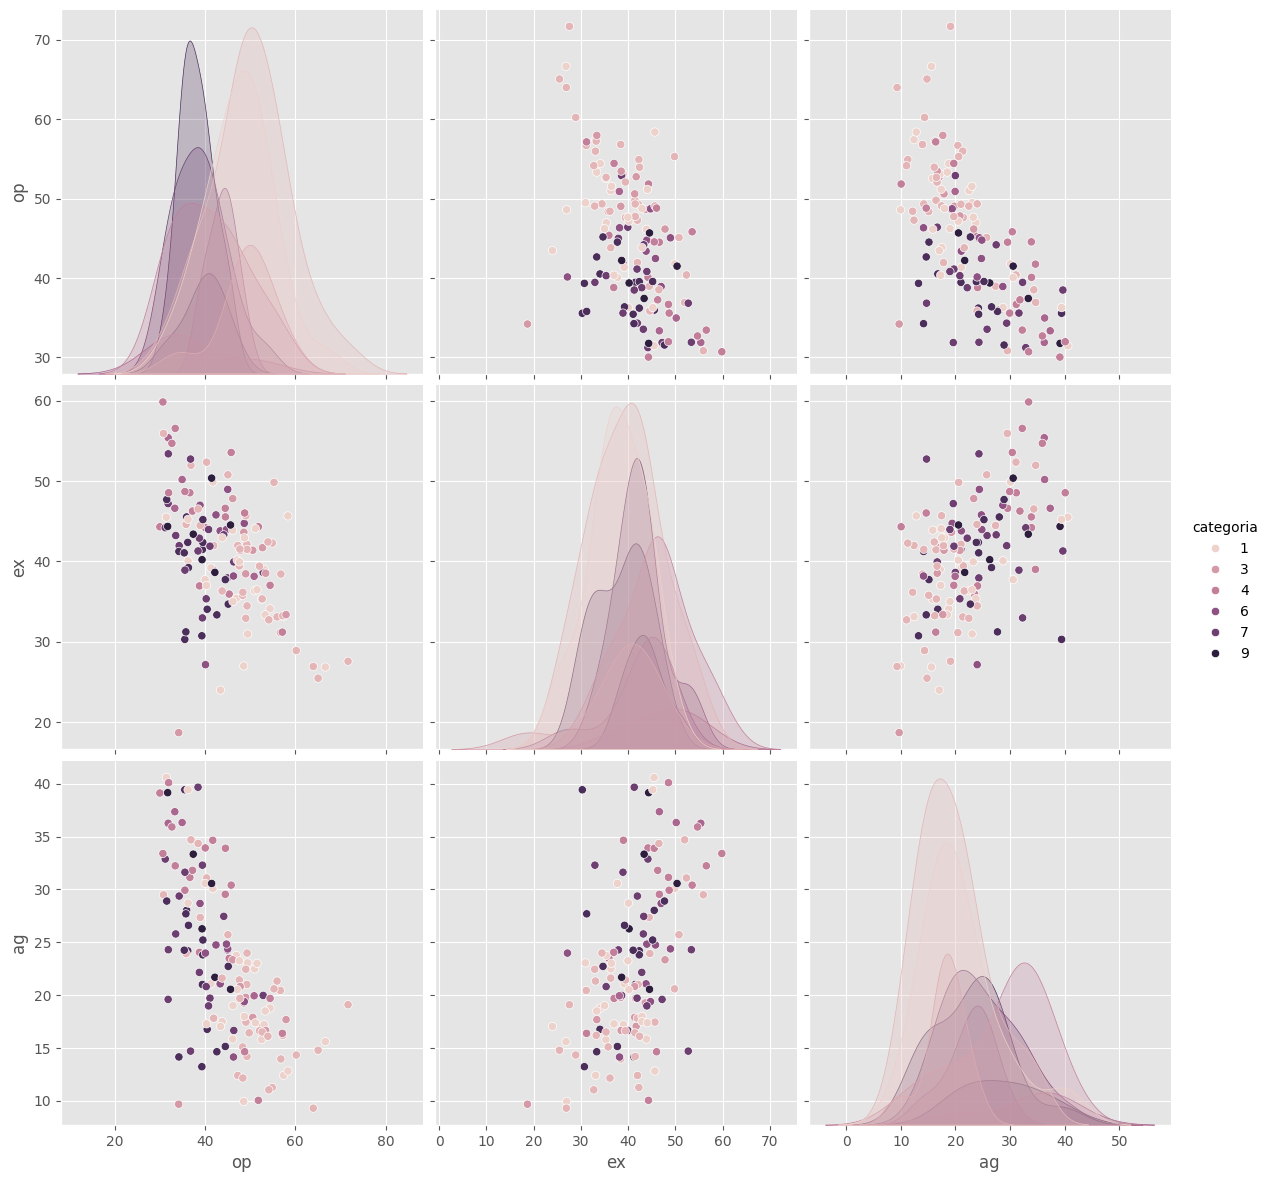

In [9]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

Revisando la gráfica no pareciera que haa algún tipo de agrupación o correlación entre los usuarios y sus categorías.

Definimos la entrada

Concretamos la estructura de datos que utilizaremos para alimentar el algoritmo. Como se ve, sólo cargamos las columnas op, ex y ag en nuestra variable X.

In [15]:
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

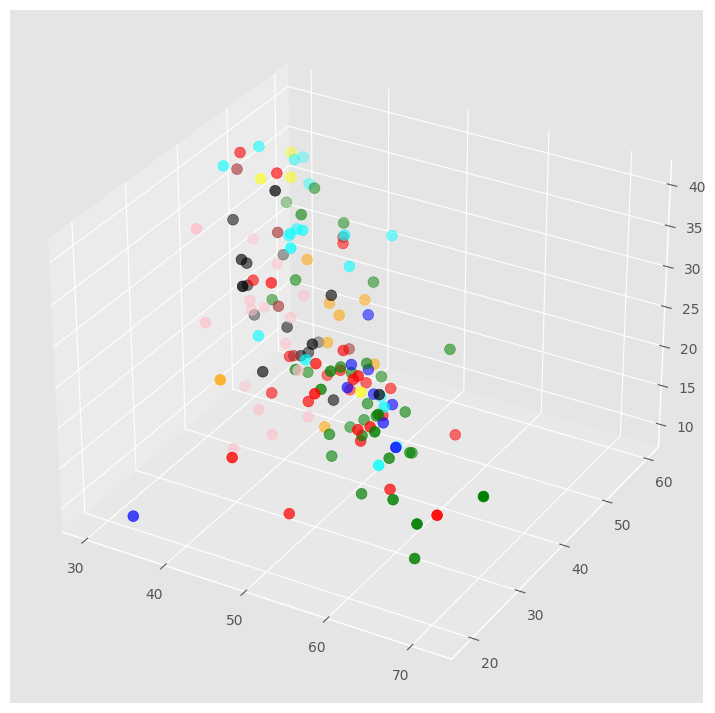

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Definir los colores
colores = ['blue', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'black', 'pink', 'brown', 'purple']

asignar = []
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

# Mostrar la gráfica
plt.show()


Veremos si con K-means, podemos “pintar” esta misma gráfica de otra manera, con clusters diferenciados.

Obtener el valor K
Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que comentábamos antes. Este es nuestro resultado:

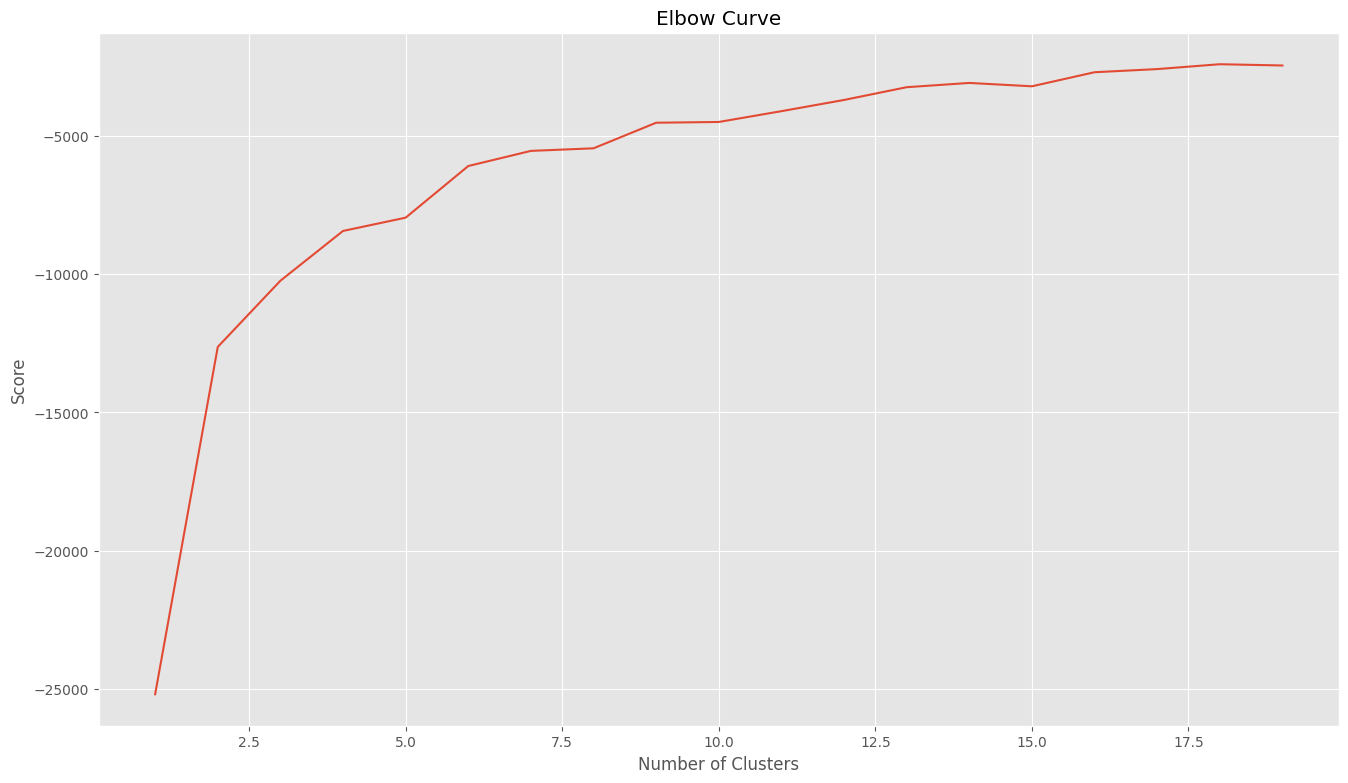

In [31]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Realmente la curva es bastante “suave”. Considero a 5 como un buen número para K. Según vuestro criterio podría ser otro.

Ejecutamos K-Means
Ejecutamos el algoritmo para 5 clusters y obtenemos las etiquetas y los centroids.

In [32]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[47.50175131 39.90235087 18.72413607]
 [33.98134736 49.445743   34.45634373]
 [57.63426538 32.95310414 15.51772971]
 [38.7400305  30.138451   22.4947827 ]
 [39.62541315 44.57839158 26.92820761]]


Ahora veremos esto en una gráfica 3D con colores para los grupos y veremos si se diferencian: (las estrellas marcan el centro de cada cluster)

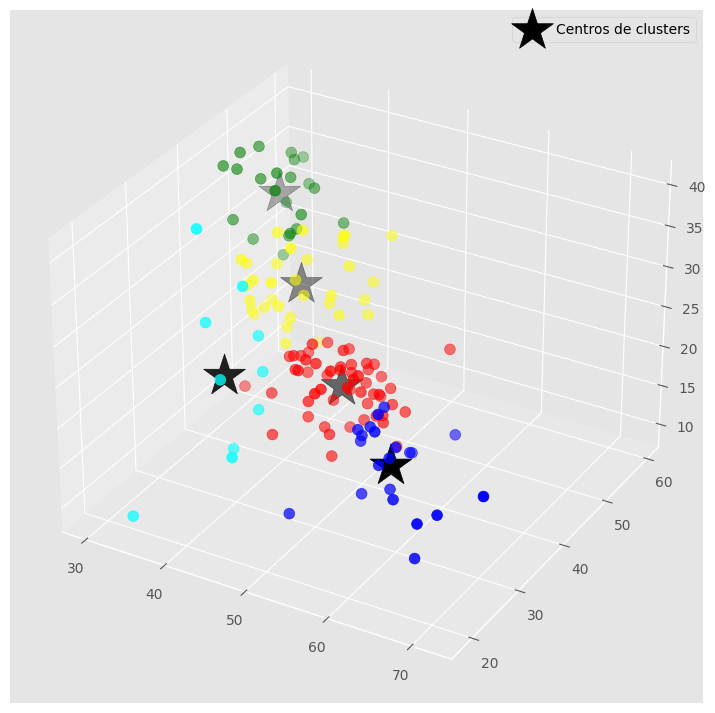

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Supongamos que ya has definido y ajustado el modelo KMeans
labels = kmeans.predict(X)
C = kmeans.cluster_centers_

# Define colores para cada cluster (ajusta según la cantidad de clusters)
colores = ['red', 'green', 'blue', 'cyan', 'yellow']

# Asignar colores a cada punto basado en su etiqueta
asignar = []

for row in labels:
    asignar.append(colores[row])


# Crear la figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

# Graficar los centros de los clusters
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', color='black', s=1000, label='Centros de clusters')  # Usar un solo color para los centros

# Agregar leyenda
ax.legend()

# Mostrar la gráfica
plt.show()


Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.

Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

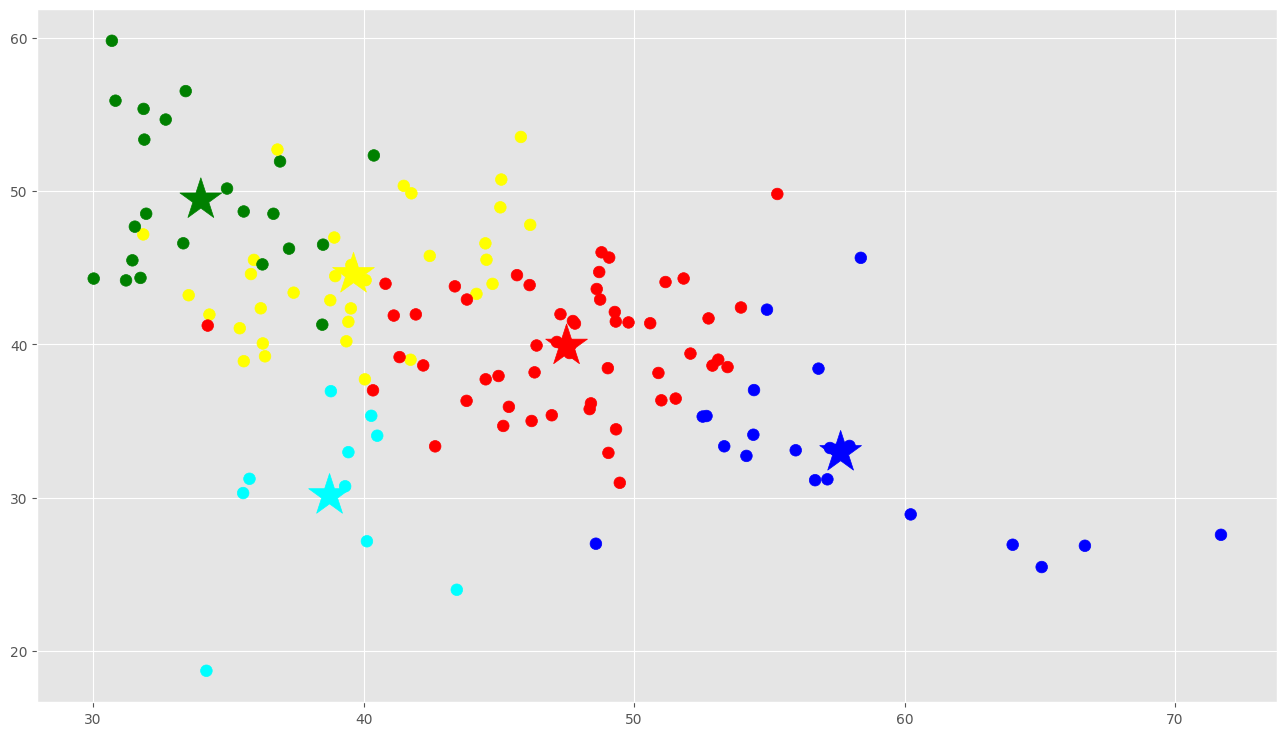

In [34]:
# Getting the values and plotting it
f1 = dataframe['op'].values
f2 = dataframe['ex'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

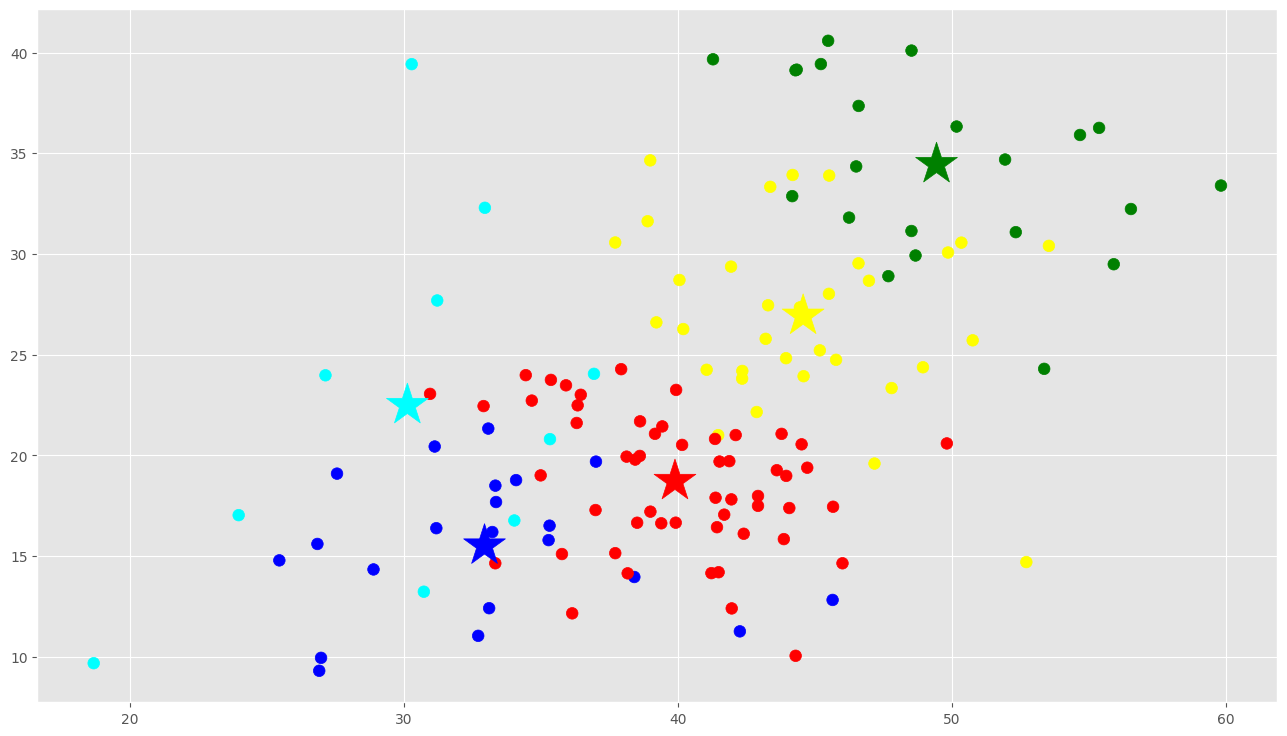

In [35]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

En estas gráficas vemos que están bastante bien diferenciados los grupos.

Podemos ver cada uno de los clusters cuantos usuarios tiene:

In [37]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,54
1,green,22
2,blue,21
3,cyan,10
4,yellow,33


Y podemos ver la diversidad en rubros laborales de cada uno. Por ejemplo en el grupo 0 (rojo), vemos que hay de todas las actividades laborales aunque predominan de actividad 1 y 2 correspondiente a Actores y Cantantes con 11 y 15 famosos.

In [40]:

group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,14.0
2,2,16.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,3.0
7,7,5.0
8,8,4.0
9,9,2.0


In [41]:
#imprimimos en pantalla los usuarios con categoria 2 del grupo
for index, row in group_referrals.iterrows():
    if row["categoria"] == 2:
        print (row["usuario"], row["categoria"],row["label"])

AvrilLavigne 2 0
britneyspears 2 0
celinedion 2 0
Courtney 2 0
Fergie 2 0
IamStevenT 2 0
jtimberlake 2 0
justinbieber 2 0
kanyewest 2 0
katyperry 2 0
KidRock 2 0
ladygaga 2 0
LennyKravitz 2 0
shakira 2 0
taylorswift13 2 0
thelittleidiot 2 0


De categoría 3 “modelos” hay 6 sobre un total de 9.

Buscaremos los usuarios que están más cerca a los centroids de cada grupo que podríamos decir que tienen los rasgos de personalidad característicos que representan a cada cluster:

In [39]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 89,  35,  75, 126,  38], dtype=int64)

In [28]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

kobebryant
foofighters
JPVarsky
carmenelectra
fieritacatalano


En los centros vemos que tenemos una modelo, un político, presentadora de Tv, locutor de Radio y un deportista.

Clasificar nuevas muestras
Y finalmente podemos agrupar y etiquetar nuevos usuarios twitter con sus características y clasificarlos. Vemos el ejemplo con el usuario de David Guetta y nos devuelve que pertenece al grupo 1 (verde).

In [29]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

[4]
